# Dataset

## Create dataset

In [1]:
%%sh
export BUCKET=workshop-ml-demo

echo "Creating repo"
#gsutil mb -c standard -l us-central1 gs://${BUCKET} # or manually
gsutil ls gs://${BUCKET} # It bucket doesn't exit, it will stop execution

echo "Moving data from repo to local"
git clone 'https://github.com/ardamavi/Sign-Language-Digits-Dataset.git'

echo "Moving data from local to bucket"
gsutil -m -q cp -r ./Sign-Language-Digits-Dataset/Dataset/* gs://${BUCKET}

# Create Vertex import file
echo "Creating import file"
export IMPORT_DATA_FILE='./data.csv'
gsutil ls -r gs://${BUCKET}/** > tmp.csv
#sed -i '1d' tmp.csv
cat tmp.csv | while read line ; do echo $line ',' $(basename $(dirname $line)) ; done > ${IMPORT_DATA_FILE}
gsutil cp ${IMPORT_DATA_FILE} gs://${BUCKET}
rm tmp.csv
wc -l ${IMPORT_DATA_FILE} # It should show 2062 rows


Creating repo
Moving data from repo to local
Moving data from local to bucket
Creating import file
2062 ./data.csv


Cloning into 'Sign-Language-Digits-Dataset'...
Copying file://./data.csv [Content-Type=text/csv]...
/ [1 files][ 82.6 KiB/ 82.6 KiB]                                                
Operation completed over 1 objects/82.6 KiB.                                     


## Visualize dataset

In [3]:
import os
import collections
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Shape: (100, 100, 3)
Mean: 169.67, Min: 0, Max: 218


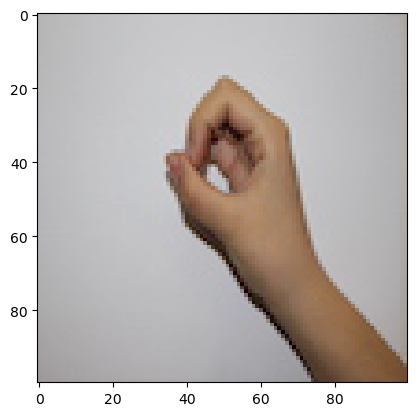

In [4]:
# Single image
img_file = "./Sign-Language-Digits-Dataset/Dataset/0/IMG_1118.JPG"
img = mpimg.imread(img_file)

# Dimensions
print(f"Shape: {img.shape}")
print(f"Mean: {img.mean():.02f}, Min: {img.min()}, Max: {img.max()}")

# Visualize
imgplot = plt.imshow(img)
plt.show()


In [5]:
# All images
dataset_folder= "./Sign-Language-Digits-Dataset/Dataset/"

samples_per_class = {d: len(os.listdir(dataset_folder + '/' + d)) for d in os.listdir(dataset_folder)}

print(f"Number of classes: {len(os.listdir(dataset_folder))}, Number of samples: {sum(list(samples_per_class.values()))}")  
print(collections.OrderedDict(sorted(samples_per_class.items())))


Number of classes: 10, Number of samples: 2062
OrderedDict([('0', 205), ('1', 206), ('2', 206), ('3', 206), ('4', 207), ('5', 207), ('6', 207), ('7', 206), ('8', 208), ('9', 204)])
